In [1]:
#create word clouds(visualization technique)from text data 
#lazypredict evaluate machine leanring process

In [1]:
pip install wordcloud lazypredict

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.4 kB)
  Obtaining dependency information for lazypredict from https://files.pythonhosted.org/packages/bb/df/936639581c018ac59b1096d34e42d39e967d97bf09b1fdb1645e64852e36/lazypredict-0.2.12-py2.py3-none-any.whl.metadata
  Using cached lazypredict-0.2.12-py2.py3-none-any.whl.metadata (12 kB)
  Using cached lightgbm-4.3.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk  # Natural Language Toolkit for NLP tasks
from nltk.stem import WordNetLemmatizer  # Lemmatization of words
from nltk.corpus import stopwords  # Stopwords for text preprocessing
from nltk.probability import FreqDist  # Frequency distribution of words
import pandas as pd  # Data manipulation and analysis
from sklearn.utils import resample  # Resampling data for handling class imbalance
from wordcloud import WordCloud  # Generating word clouds from text data
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization library built on matplotlib
import numpy as np  # Numerical computing with arrays
import re  # Regular expressions for string manipulation
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer  # Text vectorization methods
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve  # Evaluation metrics for classification tasks
from sklearn.compose import ColumnTransformer  # Transformation of columns in a dataset
from sklearn.preprocessing import OneHotEncoder  # Encoding categorical features
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn import svm  # Support Vector Machine classifier
import pickle  # Serialization of Python objects
import time  # Time-related functions
#from lazypredict.Supervised import LazyClassifier, LazyRegressor
import pickle
import time

nltk.download('punkt')
nltk.download('wordnet')

ModuleNotFoundError: No module named 'wordcloud'

# dataset 1

# checking for null values in data

In [4]:
data1 = pd.read_csv('twitter_parsed_dataset.csv')
#create dataset
print('data with NULL values')
print(data1.isnull().sum())
print(data1.describe())#print statistical summary
data1.head()

data with NULL values
index         0
id            1
Text          1
Annotation    3
oh_label      3
dtype: int64
           oh_label
count  16848.000000
mean       0.317367
std        0.465465
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0


# removing unecessary columns, renaming and standardising column names, with oh_label being a classifier of whether the sentence is a hate speech or not

In [5]:
data1 = pd.DataFrame(data1[['id','oh_label','Text']])#choosing coloumns
print('='*50)
print("\nBefore\n", data1.columns)

data1.rename(columns = {'oh_label':'label','Text':'tweet'}, inplace = True)#Renaming coloumns
print('='*50)
print("\nAfter\n", data1.columns)
print('='*50)


Before
 Index(['id', 'oh_label', 'Text'], dtype='object')

After
 Index(['id', 'label', 'tweet'], dtype='object')


# removing data with no values

In [6]:
data1 = data1.dropna(axis=0,how='any')#drop rows with null values

print(data1.isnull().sum())
print(data1.describe())#statistical summary
data1.head()

id       0
label    0
tweet    0
dtype: int64
              label
count  16848.000000
mean       0.317367
std        0.465465
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


,id,label,tweet
0,5.74948705591165E+017,0.0,@halalflaws @biebervalue @greenlinerzjm I read...
1,5.71917888690393E+017,0.0,@ShreyaBafna3 Now you idiots claim that people...
2,3.90255841338601E+017,1.0,"RT @Mooseoftorment Call me sexist, but when I ..."
3,5.68208850655916E+017,1.0,"@g0ssipsquirrelx Wrong, ISIS follows the examp..."
4,5.75596338802373E+017,0.0,#mkr No No No No No No


# dataset2

# checking for null values in data

In [7]:
data2 = pd.read_csv('toxicity_parsed_dataset.csv')
print('data with NULL values')
print(data2.isnull().sum())# Print the number of NULL values in each column of the DataFrame 'data2'
print(data2.describe())#Statiscal summary 
data2.head()

data with NULL values
index         0
Text          0
ed_label_0    0
ed_label_1    0
oh_label      0
dtype: int64
              index     ed_label_0     ed_label_1       oh_label
count  159686.00000  159686.000000  159686.000000  159686.000000
mean    79842.50000       0.854951       0.145049       0.096201
std     46097.52188       0.253866       0.253866       0.294868
min         0.00000       0.000000       0.000000       0.000000
25%     39921.25000       0.800000       0.000000       0.000000
50%     79842.50000       1.000000       0.000000       0.000000
75%    119763.75000       1.000000       0.200000       0.000000
max    159685.00000       1.000000       1.000000       1.000000


,index,Text,ed_label_0,ed_label_1,oh_label
0,0,This: :One can make an analogy in mathematical...,0.9,0.1,0
1,1,` :Clarification for you (and Zundark's righ...,1.0,0.0,0
2,2,Elected or Electoral? JHK,1.0,0.0,0
3,3,`This is such a fun entry. Devotchka I once...,1.0,0.0,0
4,4,Please relate the ozone hole to increases in c...,0.8,0.2,0


# removing unecessary columns, renaming and standardising column names, with oh_label being a classifier of whether the sentence is a hate speech or not

In [8]:
data2 = pd.DataFrame(data2[['index','oh_label','Text']])
# Before renaming the columns
print('='*50)
print("\nBefore\n", data2.columns)

data2.rename(columns = {'index':'id','oh_label':'label','Text':'tweet'}, inplace = True)
print('='*50)  
# After renaming the columns
print("\nAfter\n", data2.columns)
print('='*50)


Before
 Index(['index', 'oh_label', 'Text'], dtype='object')

After
 Index(['id', 'label', 'tweet'], dtype='object')


# merge data

In [9]:
data = pd.concat([data1, data2], ignore_index = True)
# Combine two DataFrames 'data1' and 'data2' into a single DataFrame 'data'
print(data.shape)

(176534, 3)


# cleaning the data, by removing uneccesary characters in sentences, such as url,twitter handles,RT tags 

In [10]:
def  clean(df, text):#function to clean data
    df[text] = df[text].str.lower()#convert to lower
    df[text] = df[text].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df#removing special charachters such as url,twitter handles,RT tags

# Split the training set into two subsets based on their labels (0 and 1)
data_clean = clean(data,"tweet")
data_majority = data_clean[data_clean.label==0]
data_minority = data_clean[data_clean.label==1]

# as the sample size of hate speech to non hate speech is drastically imbalance, we upsampled the minority to balance it out

In [11]:
# upsampling the minority class in the training set to address class imbalance
# resample() function  to resample the minority class
# combine the upsampled minority class with the original majority class
data_minority_upsampled = resample(data_minority,replace=True,n_samples=len(data_majority),random_state=123)
data_upsampled = pd.concat([data_minority_upsampled,data_majority])
data_upsampled['label'].value_counts()

label
1.0    155825
0.0    155825
Name: count, dtype: int64

In [12]:
data_upsampled

,id,label,tweet
168782,151934,1.0,aubreys 1 fan wow guy dont get so worked up ...
120951,104103,1.0,i hate you firstly do you know that i do n...
142550,125702,1.0,you are gay you are shit
117004,100156,1.0,tiderolls you are a shitty phage and you des...
44564,27716,1.0,fuck you faggot fuck you faggot
...,...,...,...
176529,159681,0.0,these sources dont exactly exude a sense of...
176530,159682,0.0,the institute for historical review is a pee...
176531,159683,0.0,the way youre trying to describe it in this a...
176532,159684,0.0,warning there is clearly a protectionist ...


# histogram of quantity of data pre vs post upsampling 

<Axes: title={'center': 'After upsampling'}, xlabel='label', ylabel='Count'>

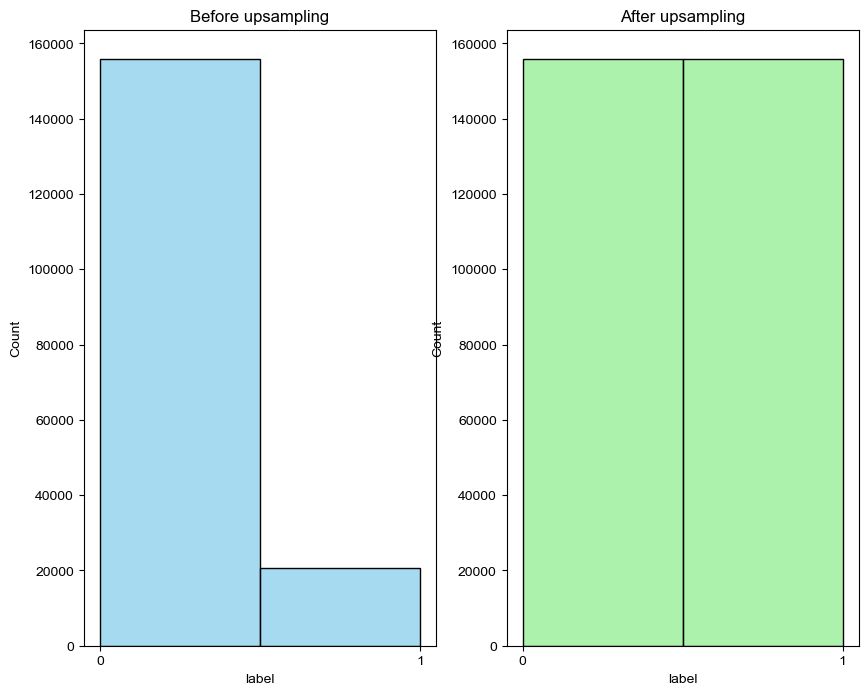

In [13]:
fig, axs = plt.subplots(1,2 , figsize=(10,8))# Create a figure with two subplots, arranged in 1 row and 2 columns
sns.set_style('darkgrid')
axs[0].set_title('Before upsampling')# Set titles for each subplot
axs[1].set_title('After upsampling')
axs[0].set_xticks([0, 1], ['0', '1'])# Set x-axis ticks and labels for both subplots
axs[1].set_xticks([0, 1], ['0', '1'])
sns.histplot(data = data['label'],edgecolor='black' , color='skyblue', legend=True,ax=axs[0], bins=2)
sns.histplot(data = data_upsampled['label'],edgecolor='black' , color = 'lightgreen', legend=True,ax=axs[1], bins=2)

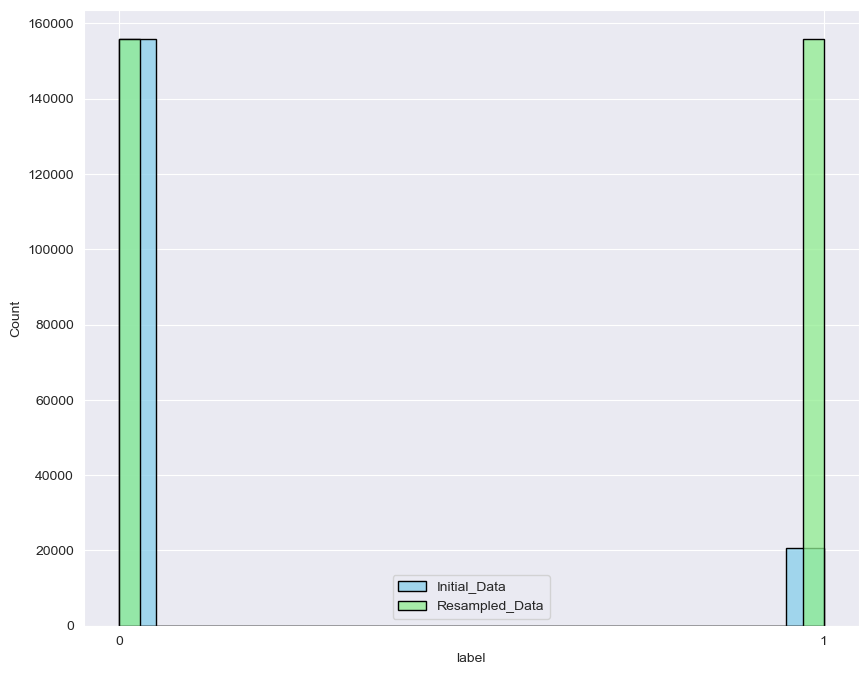

In [14]:
# Plot a histogram for the original training data
plt.figure(figsize=(10,8))
plt.xticks([0, 1], ['0', '1'])
sns.set_style('darkgrid')
sns.histplot(data = data['label'],edgecolor='black', color='skyblue', legend=True)
sns.histplot(data = data_upsampled['label'],edgecolor='black', color = 'lightgreen', legend=True)
plt.legend(['Initial_Data', 'Resampled_Data'])
plt.show()

# Here we extract, clean and visualise the top 5 most commonly appeared words in a hate speech

In [15]:
dt_hate = data_upsampled[data_upsampled.label==1]
tokenized_hate = dt_hate['tweet'].apply(nltk.word_tokenize)

# tokenizing sentence, turning it into word form

In [16]:
tokenized_hate.head()

168782    [aubreys, 1, fan, wow, guy, dont, get, so, wor...
120951    [i, hate, you, firstly, do, you, know, that, i...
142550                      [you, are, gay, you, are, shit]
117004    [tiderolls, you, are, a, shitty, phage, and, y...
44564                [fuck, you, faggot, fuck, you, faggot]
Name: tweet, dtype: object

In [17]:
lemmatizer = WordNetLemmatizer()
def lemmatize_sentence(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]
lemmatized_hate = tokenized_hate.apply(lemmatize_sentence)

# lemmatizing words, converts words to base form, eg hates > hate

In [18]:
lemmatized_hate.head()

168782    [aubreys, 1, fan, wow, guy, dont, get, so, wor...
120951    [i, hate, you, firstly, do, you, know, that, i...
142550                      [you, are, gay, you, are, shit]
117004    [tiderolls, you, are, a, shitty, phage, and, y...
44564                [fuck, you, faggot, fuck, you, faggot]
Name: tweet, dtype: object

In [19]:
stop_words = set(stopwords.words('english'))
def remove_stop_words(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

# Remove stop words from each lemmatized sentence in the DataFrame
clean_hate = lemmatized_hate.apply(remove_stop_words)

# removing grammar words, words such as: are do so etc

In [20]:
clean_hate.head()

168782    [aubreys, 1, fan, wow, guy, dont, get, worked,...
120951    [hate, firstly, know, information, around, the...
142550                                          [gay, shit]
117004    [tiderolls, shitty, phage, desperately, need, ...
44564                          [fuck, faggot, fuck, faggot]
Name: tweet, dtype: object

In [21]:
final = [word for tweet in clean_hate for word in tweet]# Create a list 'final' containing all words from the cleaned hate tweets
freq_dist = FreqDist(final)
top_words = freq_dist.most_common(5)# Get the top 5 most common words and their frequencies
top_words_df = pd.DataFrame(top_words, columns=['Words', 'Frequency'])# Create a DataFrame 'top_words_df' to store the top words and their frequencies


# sorting the frequency of words, displaying only the top 5 most common

In [22]:
print(top_words_df)

    Words  Frequency
0    fuck      62196
1    suck      34957
2    like      31892
3    dont      29648
4  nigger      28345


# visualisation of top5 words

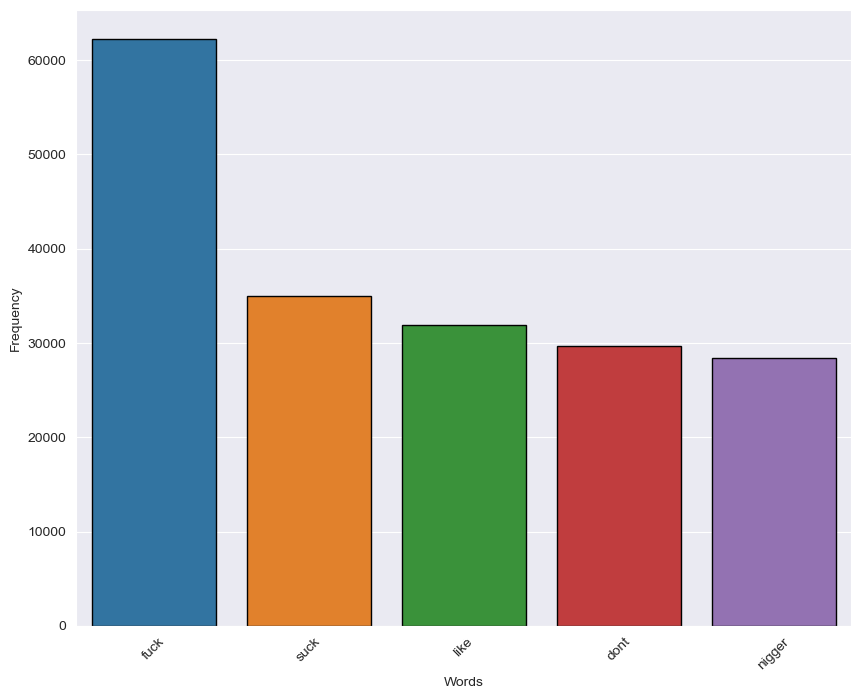

In [23]:
plt.figure(figsize=(10,8))
sns.barplot(data = top_words_df, x='Words', y='Frequency',edgecolor='black')# Create a bar plot using seaborn, with 'Words' on the x-axis and 'Frequency' on the y-axis

plt.xticks(rotation=45)
plt.show()

# Visual representative of words in the 2 categories of data

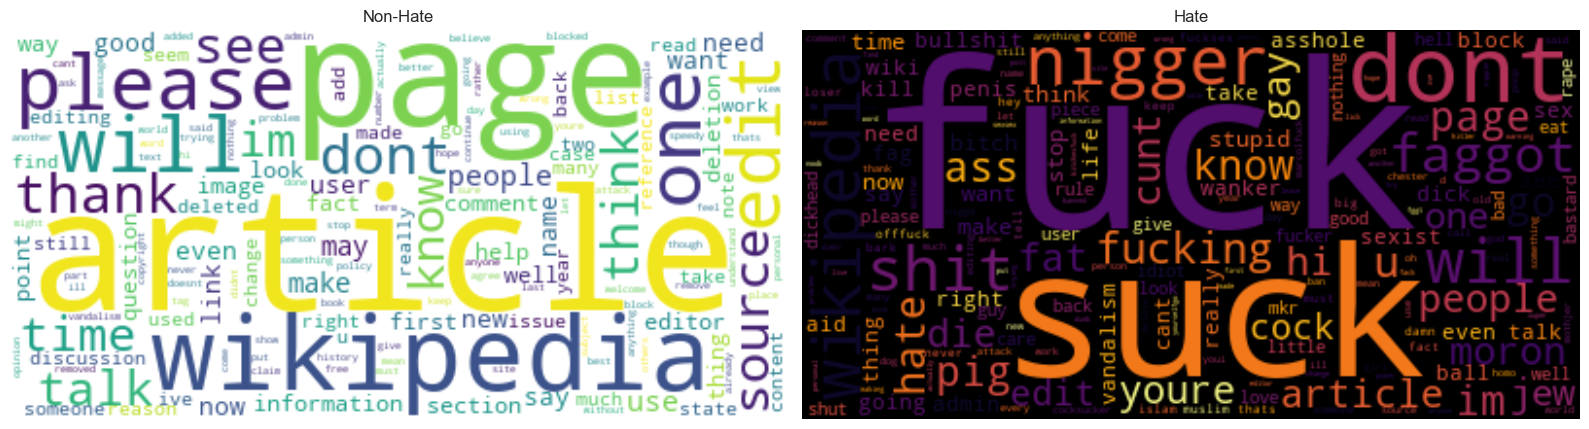

In [24]:
fig, axs = plt.subplots(1,2 , figsize=(16,8))
positive = " ".join(data_upsampled['tweet'][data_upsampled.label == 0])
negative = " ".join(data_upsampled['tweet'][data_upsampled.label == 1])
# Generate word clouds for Non-Hate Comments and Hate Comments
cloud_pos = WordCloud(collocations = False, background_color = 'white', colormap='viridis').generate(positive)
cloud_neg = WordCloud(collocations = False, background_color = 'black', colormap='inferno').generate(negative)
# Display word cloud for Non-Hate Comments in the first subplot
axs[0].imshow(cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate')
# Display word cloud for Hate Comments in the second subplot
axs[1].imshow(cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate')
plt.tight_layout()
plt.show()

Visualizing Word Clouds for Non-Hate and Hate Comments
Here, We used word clouds to understand and visualise the textual content of dataset.
It helped us in identifying Common Themes by detecting the most frequent words in each category of comments.
Also this helped in Exploring Language Patterns thus gaining insights into the linguistic characteristics and sentiment of the comments in each category.Features derived from the most significant words in the word clouds can be used to build classification models that distinguish between non-hate and hate comments effectively.

# converting data into numeric representations
# y represents category of sentence(hate or no hate)
# x represents the words in the sentence

In [25]:
# Create a new DataFrame 'new_dt' containing only the 'label' and 'tweet' columns from the upsampled data
new_dt = data_upsampled[['label', 'tweet']]
# Extract values from the DataFrame, excluding the last column ('tweet'), which contains the features
# It seems there's a small mistake in the index selection. .
# This ensures that only the 'label' column is selected.
y = new_dt.iloc[:, :-1].values


In [26]:
# Create a ColumnTransformer object with specified transformations
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# Apply the transformations to the 'y' data
y = np.array(ct.fit_transform(y))
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [27]:
print(y.shape)

(311650, 2)


In [28]:
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [29]:
cv = CountVectorizer(max_features = 2000)# Create a CountVectorizer object with a maximum vocabulary size of 2000
x = cv.fit_transform(data_upsampled['tweet']).toarray()# Fit the CountVectorizer to the 'tweet' column of the upsampled data and transform the text data into a matrix of token counts

x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
x.shape

(311650, 2000)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y_hate, test_size = 0.25, random_state = 1)

# Here we tested various models and computed the time taken to train the models

In [32]:
# Using Naive Bayes Classifier

classifier_np = GaussianNB()

# Start timer
start_time = time.time()

classifier_np.fit(x_train, y_train)

# End timer
end_time = time.time()

In [33]:
# Calculate training time
training_time = end_time - start_time

print(f"Training time of Naive Bayes: {training_time:.6f} seconds")

Training time of Naive Bayes: 60.893718 seconds


In [34]:
# Using Decision Tree

classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Start timer
start_time = time.time()

classifier_dt.fit(x_train, y_train)

# End timer
end_time = time.time()

In [35]:
# Calculate training time
training_time = end_time - start_time

print(f"Training time of Decision Tree: {training_time:.6f} seconds")

Training time of Decision Tree: 864.735722 seconds


In [36]:
# Using KNN

classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Start timer
start_time = time.time()

classifier_knn.fit(x_train, y_train)

# End timer
end_time = time.time()

In [37]:
# Calculate training time
training_time = end_time - start_time

print(f"Training time of KNN: {training_time:.6f} seconds")

Training time of KNN: 0.031255 seconds


In [38]:
# Using Logistic Regression

classifier_lr = LogisticRegression(random_state = 0, max_iter = 500000)

# Start timer
start_time = time.time()

classifier_lr.fit(x_train, y_train)

# End timer
end_time = time.time()

In [39]:
# Calculate training time
training_time = end_time - start_time

print(f"Training time of Logistic Regression: {training_time:.6f} seconds")

Training time of Logistic Regression: 432.518365 seconds


In [40]:
# Using Random Forest

classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

# Start timer
start_time = time.time()

classifier_rf.fit(x_train, y_train)

# End timer
end_time = time.time()

In [41]:
# Calculate training time
training_time = end_time - start_time

print(f"Training time of Random Forest: {training_time:.6f} seconds")

Training time of Random Forest: 161.284364 seconds


# confusion matrix of the various models

[[17765 21263]
 [  817 38068]]


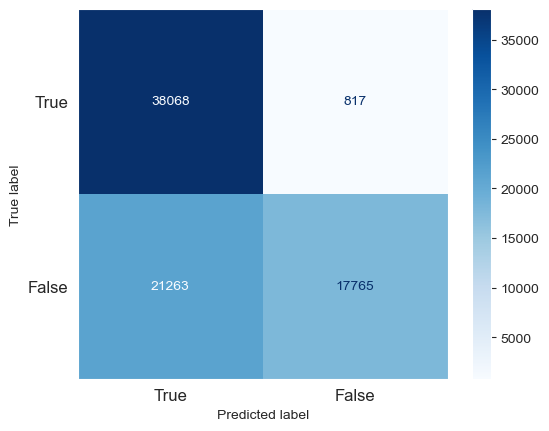

In [42]:
# Predict the labels for the test data using the Naive Bayes classifier
y_pred_np = classifier_np.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_np)

# Print the confusion matrix
print(cm)

# Create a ConfusionMatrixDisplay object with the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_np, labels = [1,0]), display_labels = [True, False])
cm_display.plot(cmap='Blues', xticks_rotation='horizontal', values_format='d', ax=plt.gca())

# Set font sizes for x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Disable grid lines
plt.grid(False)

# Show the plot
plt.show()


In [43]:
yhat_np = classifier_np.predict_proba(x_test)
print('y_hat_shape for Naive Bayes: ',yhat_np.shape)
yhat_np = yhat_np[:, 1]# Select the predicted probabilities for the positive class (class 1)
fpr_np, tpr_np, _ = metrics.roc_curve(y_test, yhat_np)# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
auc_np = round(metrics.roc_auc_score(y_test, yhat_np), 4)

y_hat_shape for Naive Bayes:  (77913, 2)


[[38755   273]
 [ 3046 35839]]


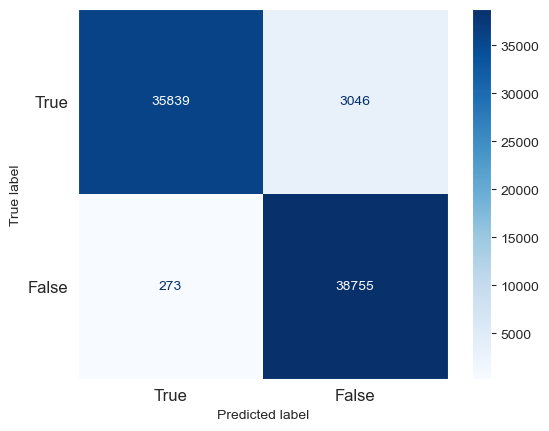

In [44]:
#Decision Tree
y_pred_dt = classifier_dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)# Create a ConfusionMatrixDisplay object with the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_dt, labels = [1,0]), display_labels = [True, False])
cm_display.plot(cmap='Blues', xticks_rotation='horizontal', values_format='d', ax=plt.gca())# Plot the confusion matrix
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()

In [45]:
yhat_dt = classifier_dt.predict_proba(x_test)# Predict probabilities of the positive class using the Decision Tree classifier
print('y_hat_shape for Decision Tree: ',yhat_dt.shape)
yhat_dt = yhat_dt[:, 1]
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test, yhat_dt)# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
auc_dt = round(metrics.roc_auc_score(y_test, yhat_dt), 4)# Compute the Area Under the Curve (AUC) for the ROC curve

y_hat_shape for Decision Tree:  (77913, 2)


In [46]:
#KNN
y_pred_knn = classifier_knn.predict(x_test)

[[37862  1166]
 [ 8170 30715]]


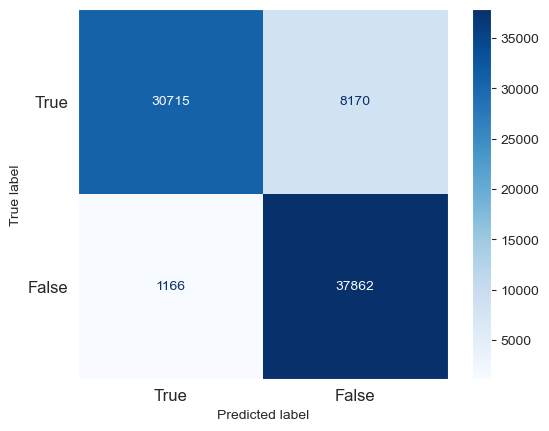

In [47]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_knn, labels = [1,0]), display_labels = [True, False])
cm_display.plot(cmap='Blues', xticks_rotation='horizontal', values_format='d', ax=plt.gca())
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()

In [49]:
yhat_knn = classifier_knn.predict_proba(x_test)
print('y_hat_shape for KNN: ',yhat_knn.shape)
yhat_knn = yhat_knn[:, 1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, yhat_knn)
auc_knn = round(metrics.roc_auc_score(y_test, yhat_knn), 4)

y_hat_shape for KNN:  (77913, 2)


[[32963  6065]
 [ 3539 35346]]


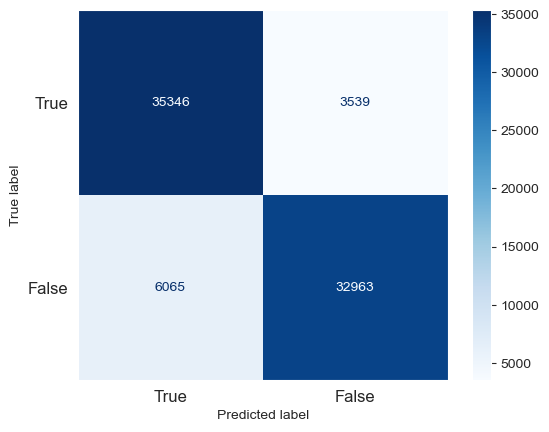

In [50]:
#Logistic Regression
y_pred_lr=classifier_lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_lr, labels = [1,0]), display_labels = [True, False])
cm_display.plot(cmap='Blues', xticks_rotation='horizontal', values_format='d', ax=plt.gca())
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()

In [51]:
yhat_lr = classifier_lr.predict_proba(x_test)
print('y_hat_shape for Logistic Regression: ',yhat_lr.shape)
yhat_lr = yhat_lr[:, 1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, yhat_lr)
auc_lr = round(metrics.roc_auc_score(y_test, yhat_lr), 4)

y_hat_shape for Logistic Regression:  (77913, 2)


[[38741   287]
 [ 1549 37336]]


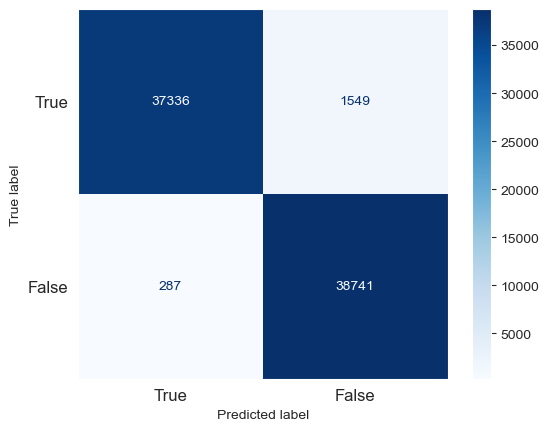

In [52]:
#Random Forest
y_pred_rf = classifier_rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_rf, labels = [1,0]), display_labels = [True, False])
cm_display.plot(cmap='Blues', xticks_rotation='horizontal', values_format='d', ax=plt.gca())
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()

In [53]:
yhat_rf = classifier_rf.predict_proba(x_test)
print('y_hat_shape for Random Forest: ',yhat_rf.shape)
yhat_rf = yhat_rf[:, 1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, yhat_rf)
auc_rf = round(metrics.roc_auc_score(y_test, yhat_rf), 4)

y_hat_shape for Random Forest:  (77913, 2)


# Here we calculated and compared the accurancy of models its f1 scores 

In [54]:
rf_score = accuracy_score(y_test, y_pred_rf)
knn_score = accuracy_score(y_test, y_pred_knn)
lr_score = accuracy_score(y_test, y_pred_lr)
dt_score = accuracy_score(y_test, y_pred_dt)
np_score = accuracy_score(y_test, y_pred_np)

print ('--' * 20)
print('Random Forest Accuracy: ', str(rf_score))
print('F1 score: ', f1_score(y_test, y_pred_rf, labels = [1,0]))
print ('--' * 20)
print ('')
print ('--' * 20)
print('K-Nearest Neighbors Accuracy: ', str(knn_score))
print('F1 score: ', f1_score(y_test, y_pred_knn, labels = [1,0]))
print ('--' * 20)
print ('')
print ('--' * 20)
print('Logistic Regression Accuracy: ',str(lr_score))
print('F1 score: ', f1_score(y_test, y_pred_lr, labels = [1,0]))
print ('--' * 20)
print ('')
print ('--' * 20)
print('Decision Tree Accuracy: ', str(dt_score))
print('F1 score: ', f1_score(y_test, y_pred_dt, labels = [1,0]))
print ('--' * 20)
print ('')
print ('--' * 20)
print('Naive Bayes Accuracy: ', str(np_score))
print('F1 score: ', f1_score(y_test, y_pred_np, labels = [1,0]))
print ('--' * 20)
print ('')

----------------------------------------
Random Forest Accuracy:  0.9764352547071734
F1 score:  0.9760025095414858
----------------------------------------

----------------------------------------
K-Nearest Neighbors Accuracy:  0.8801740402756921
F1 score:  0.8680722380804341
----------------------------------------

----------------------------------------
Logistic Regression Accuracy:  0.8767343062133405
F1 score:  0.8803925475739762
----------------------------------------

----------------------------------------
Decision Tree Accuracy:  0.9574012039069218
F1 score:  0.9557448964625253
----------------------------------------

----------------------------------------
Naive Bayes Accuracy:  0.7166069847137192
F1 score:  0.7751893785126659
----------------------------------------



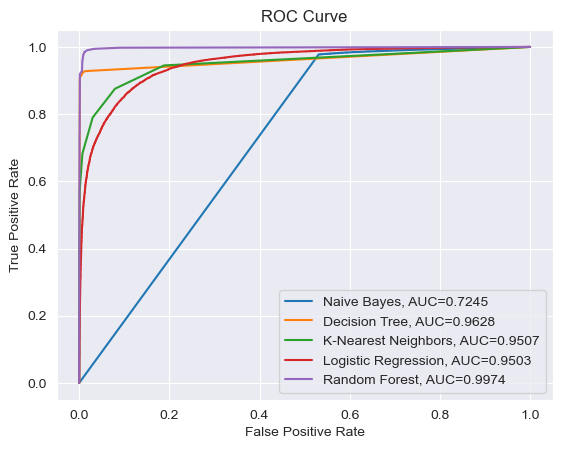

In [55]:
plt.plot(fpr_np,tpr_np,label="Naive Bayes, AUC="+str(auc_np))
plt.plot(fpr_dt,tpr_dt,label="Decision Tree, AUC="+str(auc_dt))
plt.plot(fpr_knn,tpr_knn,label="K-Nearest Neighbors, AUC="+str(auc_knn))
plt.plot(fpr_lr,tpr_lr,label="Logistic Regression, AUC="+str(auc_lr))
plt.plot(fpr_rf,tpr_rf,label="Random Forest, AUC="+str(auc_rf))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')

#add legend
plt.legend()

In [ ]:
from sklearn.metrics import auc

# Calculate AUC for Naive Bayes
auc_np = auc(fpr_np, tpr_np)

# Calculate AUC for Decision Tree
auc_dt = auc(fpr_dt, tpr_dt)

# Calculate AUC for K-Nearest Neighbors
auc_knn = auc(fpr_knn, tpr_knn)

# Calculate AUC for Logistic Regression
auc_lr = auc(fpr_lr, tpr_lr)

# Calculate AUC for Random Forest
auc_rf = auc(fpr_rf, tpr_rf)

print("AUC for Naive Bayes:", auc_np)
print("AUC for Decision Tree:", auc_dt)
print("AUC for K-Nearest Neighbors:", auc_knn)
print("AUC for Logistic Regression:", auc_lr)
print("AUC for Random Forest:", auc_rf)
